# All State Claims Severity

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#SVM
from sklearn.svm import SVR


#Library for pca decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.preprocessing import Imputer, StandardScaler, Binarizer, OneHotEncoder,\
FunctionTransformer, LabelEncoder, PolynomialFeatures

#convert test to numbers?
#from sklearn_pandas import DataFrameMapper


/Users/alexyang/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/alexyang/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
tot_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
column_names=list(tot_data.columns)
#Set continuous and coategory columns
category_cols=[]
continuous_cols=[]


for name in column_names:
    if "cat" in name:
        category_cols.append(name)
    elif 'cont' in name:
        continuous_cols.append(name)
        
print category_cols, continuous_cols
print tot_data.columns

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111

In [4]:
# Preprocessing, change both test and train data into numerical categories

In [4]:
all_data=pd.merge(tot_data,test_data,how='outer',indicator=True)
all_data.set_index('id',inplace=True)
#all_data

In [5]:
#divide into binary and nonbinary variables
binary_cols=[]
multinomial_cols=[]
useless_cols=[]
for feature in category_cols:
    #print feature
    if len(all_data[feature].unique())==2:
        binary_cols.append(feature)
    elif len(all_data[feature].unique())>2:
        multinomial_cols.append(feature)
    else:
        useless_cols.append(features)
print binary_cols
print multinomial_cols
print useless_cols

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72']
['cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat11

In [6]:
all_binary=pd.get_dummies(all_data[binary_cols],drop_first=True)
all_binary.columns=binary_cols
#all_binary




In [7]:
all_multi_cat=pd.get_dummies(all_data[multinomial_cols],drop_first=True)
multi_cat_cols=list(all_multi_cat.columns)

all_data_2=pd.concat([all_binary,all_multi_cat,all_data[continuous_cols],all_data['loss'],all_data['_merge']],axis=1)

In [8]:
all_data['cat116'].describe()

count     313864
unique       349
top           HK
freq       35076
Name: cat116, dtype: object

In [9]:
tot_data['loss'].describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

In [10]:
# for feature in multinomial_cols:
#     print len(all_data[feature].unique())

In [11]:
tot_data=all_data_2[all_data_2['_merge']=='left_only']
test_data=all_data_2[all_data_2['_merge']=='right_only']
#drop last two columns in test_data

In [12]:
del all_data, all_data_2

In [13]:
del test_data['loss']
del test_data['_merge']

In [14]:
#new category cols definitions
category_cols=binary_cols+multi_cat_cols


In [15]:
tot_data.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,_merge
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,0,0,1,0,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,left_only
2,0,1,0,0,0,0,0,0,1,1,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,left_only
5,0,1,0,0,1,0,0,0,1,1,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,left_only
10,1,1,0,1,0,0,0,0,1,0,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,left_only
11,0,1,0,1,0,0,0,0,1,1,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,left_only


# Add Log of Loss for tot Data

In [16]:
tot_data['log_loss']=tot_data['loss'].apply(np.log)

In [17]:
tot_data_length=tot_data.shape[0]
print tot_data.shape
num_test=int(round(tot_data_length*.2,0))
test_dev=tot_data.loc[:num_test/2,:]

dev=tot_data.loc[num_test/2:num_test,:]
train=tot_data.loc[num_test:,:]


(188318, 1077)


In [18]:
column_names=list(tot_data.columns)
column_names[-3:]

['loss', '_merge', 'log_loss']

In [19]:
data=column_names[:-3]
insurance_loss=column_names[-3]
log_loss=column_names[-1]

In [20]:
data[-1]
insurance_loss

'loss'

In [21]:
dev.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,_merge,log_loss
id,,,,,,,,,,,,,,,,,,,,,
18833,0,0,0,1,0,1,0,0,0,0,...,0.54829,0.62738,0.77245,0.742852,0.729856,0.675536,0.235580,1854.23,left_only,7.525225
18836,0,0,0,1,0,0,0,1,0,0,...,0.26847,0.41879,0.39068,0.678924,0.665644,0.226765,0.386701,1868.68,left_only,7.532988
18840,0,1,0,0,1,0,0,0,1,0,...,0.24564,0.30859,0.21983,0.199654,0.214808,0.351299,0.603209,1933.12,left_only,7.566891
18845,1,0,0,0,1,0,0,0,0,0,...,0.94012,0.64103,0.80218,0.745820,0.753252,0.717751,0.725314,917.39,left_only,6.821533
18847,0,1,0,1,0,0,0,0,1,0,...,0.59512,0.32496,0.26029,0.291268,0.286079,0.315758,0.216492,1463.54,left_only,7.288613


In [22]:

print train[data].head()
print train[insurance_loss][:10]

       cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10    ...     \
id                                                                    ...      
37665     1     0     0     0     1     0     0     0     0      0    ...      
37667     0     0     0     0     1     1     0     0     0      0    ...      
37668     0     1     0     0     0     0     0     0     1      0    ...      
37674     0     0     0     0     0     1     0     0     0      0    ...      
37678     0     1     0     1     1     0     1     0     1      1    ...      

          cont5     cont6     cont7    cont8    cont9   cont10    cont11  \
id                                                                         
37665  0.372405  0.348815  0.396429  0.51256  0.36285  0.36458  0.500000   
37667  0.281143  0.377085  0.386671  0.72299  0.37458  0.40666  0.341813   
37668  0.281143  0.537914  0.814752  0.32317  0.54609  0.40131  0.742852   
37674  0.372405  0.885004  0.716758  0.81542  0.58325  0.80

In [24]:
pca=PCA(n_components=500)
pca.fit_transform(train[data])

array([[ -7.48221919e-01,  -5.81875170e-01,  -6.87054170e-01, ...,
          3.63068910e-03,  -9.98408339e-03,   9.88246236e-03],
       [  1.43231434e+00,  -5.91548246e-01,   5.83074211e-01, ...,
         -2.65376596e-03,  -7.67420914e-03,  -3.86435111e-03],
       [ -9.62701233e-01,   2.67586149e-01,  -9.96556143e-01, ...,
          4.75324862e-04,  -1.57116564e-02,  -3.12368638e-03],
       ..., 
       [ -1.79017032e+00,   9.35494719e-01,  -1.35178793e+00, ...,
         -3.22015575e-03,  -1.08885745e-03,  -6.55779786e-03],
       [  1.68140124e+00,   8.99858411e-01,  -1.00287697e+00, ...,
         -8.88898468e-04,  -1.88891046e-02,   2.99774714e-05],
       [  1.59728230e+00,  -4.12388931e-01,   1.62754382e-01, ...,
         -3.21593832e-03,   4.61377609e-03,   2.96176585e-02]])

In [25]:
xtrain=pca.transform(train[data])
xdev=pca.transform(dev[data])

In [31]:
lm=LinearRegression()
out=[]
for i in xrange(1,500,10):
    lm.fit(xtrain[:,:i],train[insurance_loss])
    score=lm.score(xdev[:,:i],dev[insurance_loss])
    out.append((i,score))

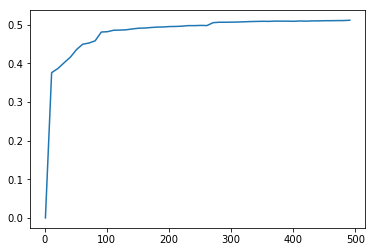

In [32]:
plt.plot(*zip(*out))

# Linear model on continuous data

(1) For each of the first 5 training examples, print the text of the message along with the label.

In [24]:
lm=LinearRegression()
lm.fit(train[continuous_cols],train[insurance_loss])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Score the linear model

In [25]:
lm.score(dev[continuous_cols],dev[insurance_loss])
print 'Train R-squared: {:.3}'.format(lm.score(train[continuous_cols],train[insurance_loss]))
print 'dev R-squared: {:.3}'.format(lm.score(dev[continuous_cols],dev[insurance_loss]))

Train R-squared: 0.0398
dev R-squared: 0.0407


In [26]:
baseline_predictions=lm.predict(test_data[continuous_cols])

In [27]:
len(baseline_predictions)
test_data['loss']=baseline_predictions

# Playing around with feature selection

In [28]:
from sklearn.feature_selection import f_regression
feature_importance = f_regression(train[continuous_cols], train[insurance_loss])[0]
def best_features(n_features,X_train,y_train,X_test,y_test):
    idx = np.argsort(-feature_importance)[:n_features]
    lr = LinearRegression()
    lr.fit(X_train.iloc[:, idx], y_train)
    return lr.score(X_test.iloc[:, idx], y_test)
out = [best_features(i,train[continuous_cols],train[insurance_loss],dev[continuous_cols],dev[insurance_loss]) for i in range(1, 14)]

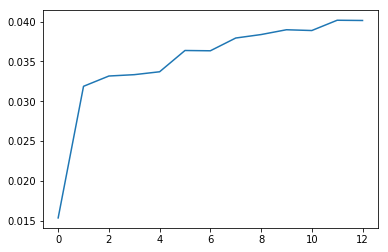

In [29]:
plt.plot(out)

**Doesn't seem to be overfit**

# Try out with PCA reduction

In [30]:
i

13

In [31]:
def best_components(n_features,X_train,y_train,X_test,y_test):
    pca = PCA(n_components=n_features)
    X_transformed = pca.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_transformed, y_train)
    return lr.score(pca.transform(X_test), y_test)

out = [best_components(i,
                      train[continuous_cols],
                       train[insurance_loss],
                       dev[continuous_cols],
                       dev[insurance_loss]) for i in range(1, 15)]

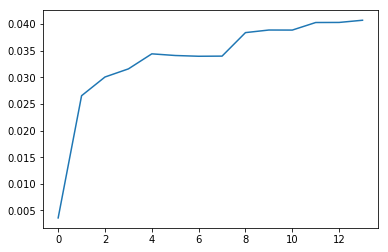

In [32]:
plt.plot(out)

# Kernel PCA? With standard scaler

In [33]:
pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('decomp', PCA()),
    ('model', LinearRegression())
])

param_grid = {
     #'decomp__kernel': ['rbf'],
    #'decomp__gamma': np.linspace(.001, .01, 50),
     'decomp__n_components': np.arange(1, 15)
}

searcher = GridSearchCV(pipe, param_grid, n_jobs=-1)
searcher.fit(train[continuous_cols],train[insurance_loss])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decomp', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'decomp__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [34]:
searcher.best_params_

{'decomp__n_components': 14}

# Plot residuals

In [35]:
residuals=dev[insurance_loss]-lm.predict(dev[continuous_cols])
residuals

id
18833   -1578.786801
18836   -1103.439877
18840    -732.570474
18845   -2698.476538
18847   -1486.751210
18849    1252.002472
18850    -244.264099
18851    2207.546143
18852    5361.855707
18853     632.276954
18855    1475.777245
18856   -1337.375102
18860   -1155.529153
18862   -1914.986612
18863   -1484.233707
18864   -1541.206467
18865    -687.632223
18868    2300.345183
18870    -333.345193
18874     820.742996
18875   -2637.555340
18879   -2175.942815
18880    -924.420722
18887   -2935.199073
18889    -770.846355
18890   -3124.956446
18891   -1551.402278
18893     801.032200
18902     -72.529309
18906   -2730.440942
            ...     
37566   -2724.649962
37573   -2375.302926
37575    1059.212532
37576   -1730.488152
37577    2468.664938
37580   -2853.073855
37583   -2609.988884
37584    -538.760736
37585     495.849756
37586    2596.751435
37591    -798.206227
37594    1956.235625
37596   -3003.068050
37598   -2382.748428
37601    -182.704095
37602    -593.298413
37613   -1

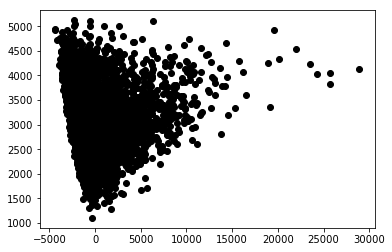

In [36]:
plt.scatter( residuals,lm.predict(dev[continuous_cols]),  color='black')

There's definitely heteroskedasticity

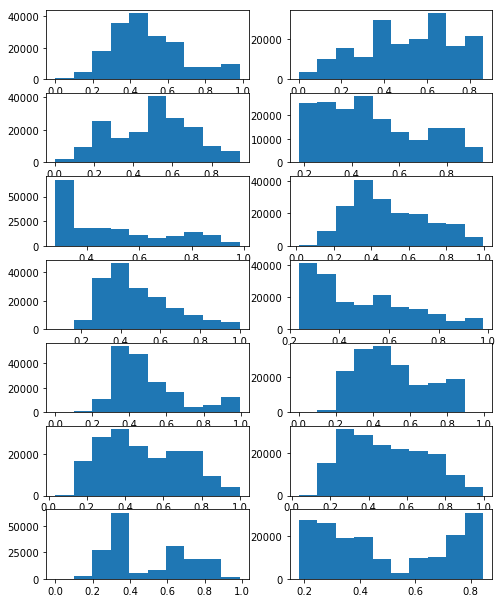

In [37]:
#plotting the histograms of 
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(8)

axes=[]
count=1
for col in continuous_cols:
        axes.append(fig.add_subplot(8,2,count))
        plt.hist(train[col])
        count+=1

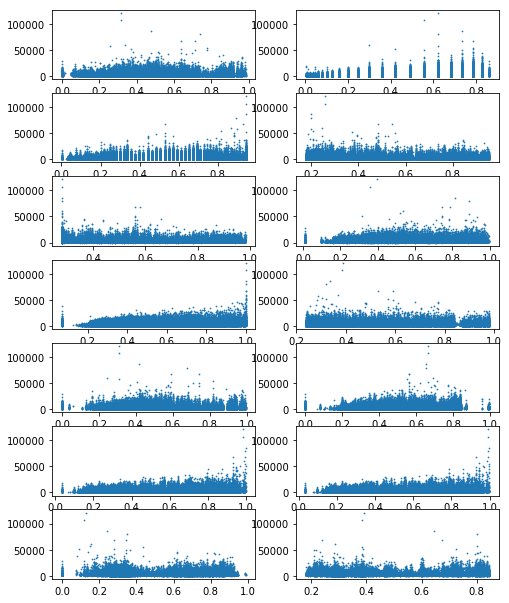

In [38]:
#plotting scatter_plot
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(8)

axes=[]
count=1
for col in continuous_cols:
        axes.append(fig.add_subplot(8,2,count))
        axes[-1].scatter(train[col],train[insurance_loss],s=.5)
        count+=1

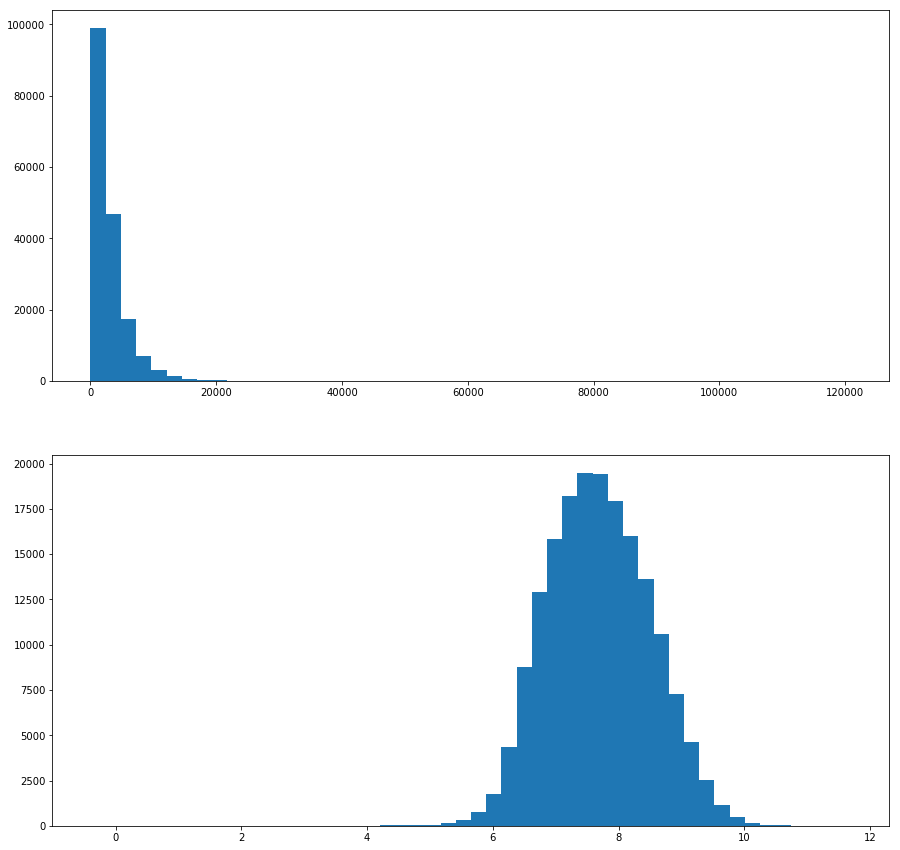

In [39]:
#testing the insurance loss
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(2,1,1)
plt.hist(train[insurance_loss], bins =50)
plt.subplot(2,1,2)
plt.hist(train[log_loss],bins=50)
plt.show()

In [40]:
#pd.get_dummies(train[binary_cols])

# Linear Model with categorical variables


In [41]:
lm=LinearRegression()
lm.fit(train[category_cols],train[insurance_loss])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:

print 'Train R-squared: {:.3}'.format(lm.score(train[category_cols],train[insurance_loss]))
print 'dev R-squared: {:.3}'.format(lm.score(dev[category_cols],dev[insurance_loss]))

Train R-squared: 0.526
dev R-squared: -3.18e+15


In [43]:
del lm
#del pca

### very overfit

In [44]:
feature_importance = f_regression(train[category_cols], train[insurance_loss])[0]
# def best_features(n_features,X_train,y_train,X_test,y_test):
#     idx = np.argsort(-feature_importance)[:n_features]
#     lr = LinearRegression()
#     lr.fit(X_train.iloc[:, idx], y_train)
#     return lr.score(X_test.iloc[:, idx], y_test)
# out = [best_features(i,train[category_cols],train[insurance_loss],dev[category_cols],dev[insurance_loss])
#        for i in range(50)]
np.argsort(-feature_importance)[:50]

/Users/alexyang/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in divide
  corr /= row_norms(X.T)
/Users/alexyang/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/alexyang/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/alexyang/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


array([ 89,  91,  88,  86, 110,  56,  11,   9,   6,  94, 112, 116,  92,
         1,  71,  10, 111,   0,   8,  12,   2,  15, 200, 124, 221,  22,
        35,  72, 198, 220,  93,  39,  27, 218,  97, 131,   5,  78, 203,
        49, 215,   4,   3, 673,  13, 217, 675, 214, 204, 151])

In [45]:
idx=np.argsort(-feature_importance)[:50]

In [46]:
lr=LinearRegression()
lr.fit(train.iloc[:,idx],train[insurance_loss])
lr.score(dev.iloc[:,idx],dev[insurance_loss])


0.42419042930694528

In [47]:
def best_features(n_features,X_train,y_train,X_test,y_test):
    idx = np.argsort(-feature_importance)[:n_features]
    lr = LinearRegression()
    lr.fit(X_train.iloc[:, idx], y_train)
    return lr.score(X_test.iloc[:, idx], y_test)
# out = [best_features(i,train[category_cols],train[insurance_loss],dev[category_cols],dev[insurance_loss])
#        for i in range(50)]

In [48]:
best_features(255,train[category_cols],train[insurance_loss],dev[category_cols],dev[insurance_loss])

0.49632725509740605

In [49]:
# out=[]
# for i in range(10):
#     out.append(best_features(i,train[category_cols],train[insurance_loss],dev[category_cols],dev[insurance_loss]))

# PCA

In [50]:
def best_components(n_features,X_train,y_train,X_test,y_test):
    pca = PCA(n_components=n_features)
    X_transformed = pca.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_transformed, y_train)
    return lr.score(pca.transform(X_test), y_test)

out = [best_components(i,
                      train[category_cols],
                       train[insurance_loss],
                       dev[category_cols],
                       dev[insurance_loss]) for i in range(1, 15)]

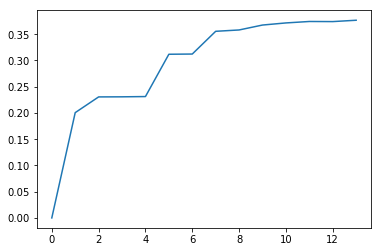

In [51]:
plt.plot(out)

In [52]:
best_components(400,
                      train[data],
                       train[insurance_loss],
                       dev[data],
                       dev[insurance_loss])

0.50894483817052416

In [53]:
out = [best_components(i,
                      train[binary_cols+continuous_cols],
                       train[insurance_loss],
                       dev[binary_cols+continuous_cols],
                       dev[insurance_loss]) for i in range(1, 85)]

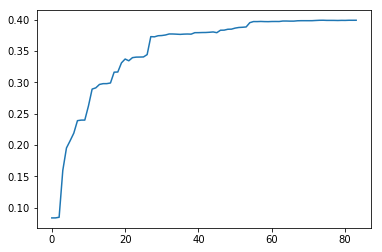

In [54]:
plt.plot(out)

In [55]:
pca=PCA()
pca.fit(train[data])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

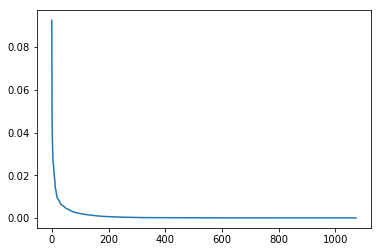

In [56]:
plt.plot(pca.explained_variance_ratio_)

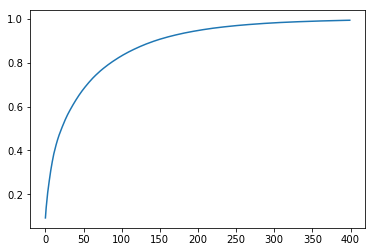

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[:400]))

In [58]:
#let's arbitarily call it 200
np.cumsum(pca.explained_variance_ratio_)[150]


0.90680668409268905

In [59]:
## try lienar regression with 100, 150, and 250 and 400 principle components
param_list=[100,150,250,300,400]
for i in param_list:
    print i,"components; Score:", best_components(i,train[data],train[insurance_loss],dev[data],dev[insurance_loss])

100 components; Score: 0.482261241224
150 components; Score: 0.49096046717
250 components; Score: 0.499061259989
300 components; Score: 0.507431812707
400 components; Score: 0.509386344416


In [60]:
#pca model without taking log of loss
pca_pipe=Pipeline(steps=[('decomp',PCA(n_components=400)),('lm',LinearRegression())])


In [61]:
pca_pipe.fit(train[data],train[insurance_loss])

Pipeline(steps=[('decomp', PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [62]:
pca_pipe.score(dev[data],dev[insurance_loss])

0.50963402360348631

In [63]:
pca_pipe.score(test_dev[data],test_dev[insurance_loss])

0.51692418902373438

In [64]:
pca_pipe2=Pipeline(steps=[('decomp',PCA(n_components=400)),('lm',LinearRegression())])
pca_pipe2.fit(train[data],train[log_loss])

Pipeline(steps=[('decomp', PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [65]:
pca_pipe2.score(dev[data],dev[log_loss])

0.50492588685011364

In [66]:
pca_pipe2.score(test_dev[data],test_dev[log_loss])

0.51570707090020984

In [67]:

test_data['linear_loss_pred']=pca_pipe.predict(test_data[data])

In [68]:
test_data['linear_loss_pred'][test_data['linear_loss_pred']<0]=0.0
test_data

/Users/alexyang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,linear_loss_pred
id,,,,,,,,,,,,,,,,,,,,,
4,0,1,0,0,0,0,0,0,1,0,...,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,2282.658876,1026.594980
6,0,1,0,1,0,0,0,0,1,0,...,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,2951.506099,2005.059373
9,0,1,0,1,1,0,1,0,1,1,...,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,3326.650736,11290.327833
12,0,0,0,0,1,0,0,0,0,0,...,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,3190.770618,5991.590000
15,1,0,0,0,0,1,0,0,0,0,...,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,2265.205785,319.808004
17,0,0,0,0,1,0,0,0,0,0,...,0.390540,0.46477,0.46853,0.50556,0.607500,0.594646,0.250991,0.283976,2278.145342,2435.956886
21,1,0,0,0,1,1,0,0,0,0,...,0.740081,0.75964,0.98330,0.82249,0.863052,0.879347,0.888944,0.787807,3565.973981,2867.482484
28,1,1,0,0,0,0,0,0,1,0,...,0.316313,0.27320,0.52100,0.50556,0.415029,0.481306,0.199940,0.450597,1849.549245,0.000000
32,0,1,0,0,0,0,0,0,1,0,...,0.358758,0.81900,0.32128,0.36458,0.453334,0.443374,0.695650,0.295075,2492.616890,2357.568495


In [69]:
test_data['linear_log_loss']=pca_pipe2.predict(test_data[data])
test_data['linear_log_loss_exp']=test_data['linear_log_loss'].apply(np.exp)
test_data

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont9,cont10,cont11,cont12,cont13,cont14,loss,linear_loss_pred,linear_log_loss,linear_log_loss_exp
id,,,,,,,,,,,,,,,,,,,,,
4,0,1,0,0,0,0,0,0,1,0,...,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,2282.658876,1026.594980,7.244297,1400.097853
6,0,1,0,1,0,0,0,0,1,0,...,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,2951.506099,2005.059373,7.495507,1799.937961
9,0,1,0,1,1,0,1,0,1,1,...,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,3326.650736,11290.327833,9.334928,11326.818355
12,0,0,0,0,1,0,0,0,0,0,...,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,3190.770618,5991.590000,8.427762,4572.255816
15,1,0,0,0,0,1,0,0,0,0,...,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,2265.205785,319.808004,6.690127,804.424130
17,0,0,0,0,1,0,0,0,0,0,...,0.46853,0.50556,0.607500,0.594646,0.250991,0.283976,2278.145342,2435.956886,7.646400,2093.097204
21,1,0,0,0,1,1,0,0,0,0,...,0.98330,0.82249,0.863052,0.879347,0.888944,0.787807,3565.973981,2867.482484,7.511480,1828.918078
28,1,1,0,0,0,0,0,0,1,0,...,0.52100,0.50556,0.415029,0.481306,0.199940,0.450597,1849.549245,0.000000,6.586757,725.424562
32,0,1,0,0,0,0,0,0,1,0,...,0.32128,0.36458,0.453334,0.443374,0.695650,0.295075,2492.616890,2357.568495,7.603434,2005.069549


# Try SVR

In [70]:
#svr_pca_pipe=Pipeline(steps=[('decomp',PCA(n_components=40)),('model',SVR())])
#svr_pca_pipe.fit_transform(train[binary_cols+continuous_cols],train[insurance_loss])

In [71]:
#svr=SVR()
#svr.fit(train[continuous_cols],train[insurance_loss])
#svr.scor[dev[continuous_cols],train[insurance_loss]]
#take way too long, try a clustering and then using a linear kernel? probably not enough time for that

# Try Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=30,min_samples_leaf=5)
RFR.fit(train[category_cols],train[insurance_loss])
RFR.score(dev[category_cols],dev[insurance_loss])

0.51782345508995875

In [73]:
RFR.score(test_dev[category_cols],test_dev[insurance_loss])

0.4966483119336737

In [74]:
test_data['RandomForLoss']=RFR.predict(test_data[category_cols])

In [75]:
test_data

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont10,cont11,cont12,cont13,cont14,loss,linear_loss_pred,linear_log_loss,linear_log_loss_exp,RandomForLoss
id,,,,,,,,,,,,,,,,,,,,,
4,0,1,0,0,0,0,0,0,1,0,...,0.38016,0.377724,0.369858,0.704052,0.392562,2282.658876,1026.594980,7.244297,1400.097853,2113.680339
6,0,1,0,1,0,0,0,0,1,0,...,0.60401,0.689039,0.675759,0.453468,0.208045,2951.506099,2005.059373,7.495507,1799.937961,2115.037878
9,0,1,0,1,1,0,1,0,1,1,...,0.30529,0.245410,0.241676,0.258586,0.297232,3326.650736,11290.327833,9.334928,11326.818355,9327.462912
12,0,0,0,0,1,0,0,0,0,0,...,0.31480,0.348867,0.341872,0.592264,0.555955,3190.770618,5991.590000,8.427762,4572.255816,6779.298364
15,1,0,0,0,0,1,0,0,0,0,...,0.50556,0.359572,0.352251,0.301535,0.825823,2265.205785,319.808004,6.690127,804.424130,706.948180
17,0,0,0,0,1,0,0,0,0,0,...,0.50556,0.607500,0.594646,0.250991,0.283976,2278.145342,2435.956886,7.646400,2093.097204,2356.068538
21,1,0,0,0,1,1,0,0,0,0,...,0.82249,0.863052,0.879347,0.888944,0.787807,3565.973981,2867.482484,7.511480,1828.918078,1636.276097
28,1,1,0,0,0,0,0,0,1,0,...,0.50556,0.415029,0.481306,0.199940,0.450597,1849.549245,0.000000,6.586757,725.424562,1364.816981
32,0,1,0,0,0,0,0,0,1,0,...,0.36458,0.453334,0.443374,0.695650,0.295075,2492.616890,2357.568495,7.603434,2005.069549,3933.575702


In [76]:
pca_rf_pipe=Pipeline(steps=[('decomp',PCA(n_components=150)),('model',RandomForestRegressor())])
pca_rf_pipe.fit_transform(train[data],train[insurance_loss])

/Users/alexyang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[-0.58187516, -0.68705412, -0.37767104, ...,  0.56313004,
        -0.04484904, -0.0614101 ],
       [-0.59154823,  0.58307423,  0.47823156, ...,  0.52122231,
         0.02565779,  0.16472084],
       [ 0.26758615, -0.99655612, -0.36955743, ..., -0.33900392,
        -0.04864932, -0.2028971 ],
       ..., 
       [ 0.93549474, -1.35178796,  0.04211189, ...,  0.09667224,
         0.15991228, -0.0757434 ],
       [ 0.89985843, -1.00287699, -0.78977184, ...,  0.05435154,
        -0.04329081, -0.01986562],
       [-0.41238894,  0.16275438, -0.62053852, ..., -0.13567156,
        -0.12189919,  0.08349595]])

In [77]:
pca_rf_pipe.score(dev[data],dev[insurance_loss])

0.44336928056482394

# Binarized loss

In [78]:
binary_loss='Binary_loss'
from sklearn.preprocessing import binarize
#x=binarize(train[insurance_loss],threshold=3000.0)
#x.shape
train[insurance_loss].describe()
#threshold will be set at 75th precentile
thresh=train[insurance_loss].quantile(.75)
train.loc[:,binary_loss]=train[insurance_loss].map(lambda x: x>thresh).astype(int)
dev.loc[:,binary_loss]=dev[insurance_loss].map(lambda x: x>thresh).astype(int)
test_dev.loc[:,binary_loss]=test_dev[insurance_loss].map(lambda x: x>thresh).astype(int)

/Users/alexyang/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/alexyang/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [79]:
knn=KNeighborsClassifier()

In [80]:
#knn.fit(train[category_cols],train[binary_loss])

In [81]:
#knn.score(dev[category_cols],dev[binary_loss])

In [82]:
#metrics.f1_score(dev[binary_loss],knn.predict(dev[category_cols]))

In [83]:
bnb=BernoulliNB(alpha=2)
bnb.fit(train[category_cols],train[binary_loss])

BernoulliNB(alpha=2, binarize=0.0, class_prior=None, fit_prior=True)

In [84]:
bnb.score(dev[category_cols],dev[binary_loss])

0.8137550200803213

In [85]:
metrics.f1_score(dev[binary_loss],bnb.predict(dev[category_cols]))

0.63639333551127086

In [86]:
metrics.f1_score(dev[binary_loss],np.zeros(5976))
#np.zeros(5976).shape

/Users/alexyang/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [87]:
from sklearn.ensemble import RandomForestClassifier



In [88]:
rfc=RandomForestClassifier(n_estimators=30)
rfc.fit(train[data],train[binary_loss])
rfc.score(dev[data],dev[binary_loss])

0.84354082998661317

# Logistic regression

In [89]:
lr=LogisticRegression()
lr.fit(train[data],train[binary_loss])
#lr.score[dev[continuous_cols],dev[binary_loss]]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
lr_pred=lr.predict(dev[data])

In [91]:
metrics.f1_score(dev[binary_loss],lr_pred)

0.64940085040587558

In [92]:
lr.intercept_

array([-2.82082495])

In [93]:

metrics.accuracy_score(dev[binary_loss],lr_pred)

0.84822623828647925

 # Split Regression

## Theoretically, if we could predict whether loss passses the threshold with 100% accuracy, how good would linear regression be?

In [94]:
# Check when above 75th percentile
pca_above=PCA(n_components=300)
features_above=pca_above.fit_transform(train.loc[train[binary_loss]==1,data])

In [95]:
lr_above=LinearRegression()
lr_above.fit(features_above,train.loc[train[binary_loss]==1,insurance_loss])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
dev_features_above=pca_above.transform(dev.loc[dev[binary_loss]==1,data])
#lr_above.predict(dev_features_above)
#,dev.loc[dev[binary_loss]==1,insurance_loss])
lr_above.score(dev_features_above,dev.loc[dev[binary_loss]==1,insurance_loss])

0.34466528902790039

In [97]:
pca_below=PCA(n_components=150)
features_below=pca_below.fit_transform(train.loc[train[binary_loss]==0,data])
lr_below=LinearRegression()
lr_below.fit(features_below,train.loc[train[binary_loss]==0,insurance_loss])
dev_features_below=pca_below.transform(dev.loc[dev[binary_loss]==0,data])
lr_below.score(dev_features_below,dev.loc[dev[binary_loss]==0,insurance_loss])

0.28987788046050611

In [98]:
#non-starter

# polynomial preprocessing

In [99]:
lr=LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
#crashes computer if too many features
poly_pipe=Pipeline(steps=[
    ('poly',PolynomialFeatures()),
    ('linear_model', LinearRegression())
])
poly_pipe.fit(train[continuous_cols],train[insurance_loss])
poly_pipe.score(dev[continuous_cols],dev[insurance_loss])

0.051884099139991813

# Submission

In [101]:
test_data.ix[:,-4:]

,linear_loss_pred,linear_log_loss,linear_log_loss_exp,RandomForLoss
id,,,,
4,1026.594980,7.244297,1400.097853,2113.680339
6,2005.059373,7.495507,1799.937961,2115.037878
9,11290.327833,9.334928,11326.818355,9327.462912
12,5991.590000,8.427762,4572.255816,6779.298364
15,319.808004,6.690127,804.424130,706.948180
17,2435.956886,7.646400,2093.097204,2356.068538
21,2867.482484,7.511480,1828.918078,1636.276097
28,0.000000,6.586757,725.424562,1364.816981
32,2357.568495,7.603434,2005.069549,3933.575702


In [102]:
submission=test_data.ix[:,-4:]
submission.to_csv('int_submission.csv',index=True)

In [103]:
(category_cols)

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73_B',
 'cat73_C',
 'cat74_B',
 'cat74_C',
 'cat75_B',
 'cat75_C',
 'cat76_B',
 'cat76_C',
 'cat77_B',
 'cat77_C',
 'cat77_D',
 'cat78_B',
 'cat78_C',
 'cat78_D',
 'cat79_B',
 'cat79_C',
 'cat79_D',
 'cat80_B',
 'cat80_C',
 'cat80_D',
 'cat81_B',
 'cat81_C',
 'cat81_D',
 'cat82_B',
 

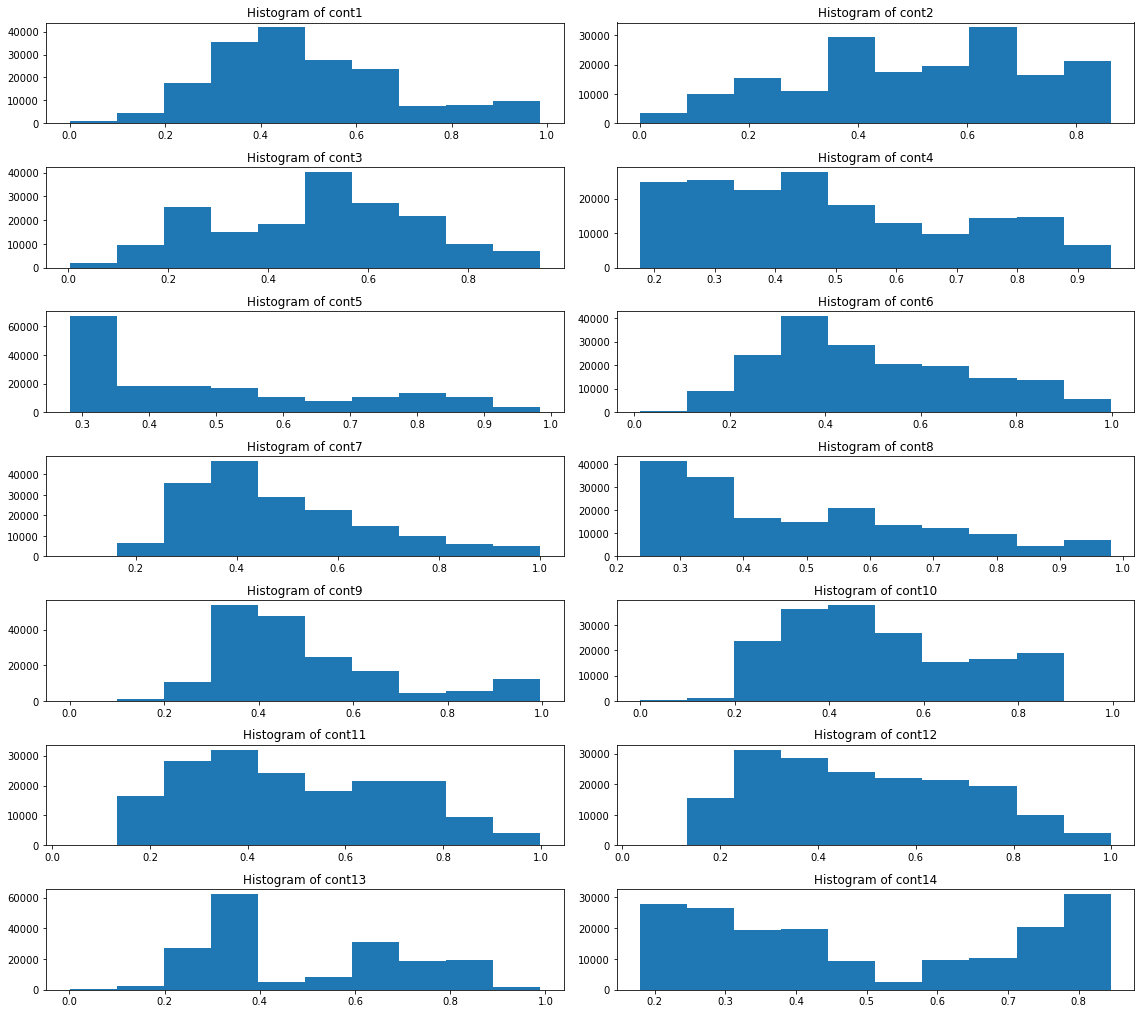

In [104]:
plt.close('all')
fig = plt.figure()
fig.set_figheight(28)
fig.set_figwidth(16)
#plt.title('Histograms of Continuous Features', fontsize=18)
axes=[]
count=1
for col in continuous_cols:
    axes.append(fig.add_subplot(14,2,count))
    #plt.set_figheight(5)
    plt.title("Histogram of "+col)
    plt.hist(train[col])
    count+=1
plt.tight_layout()
#plt.show()

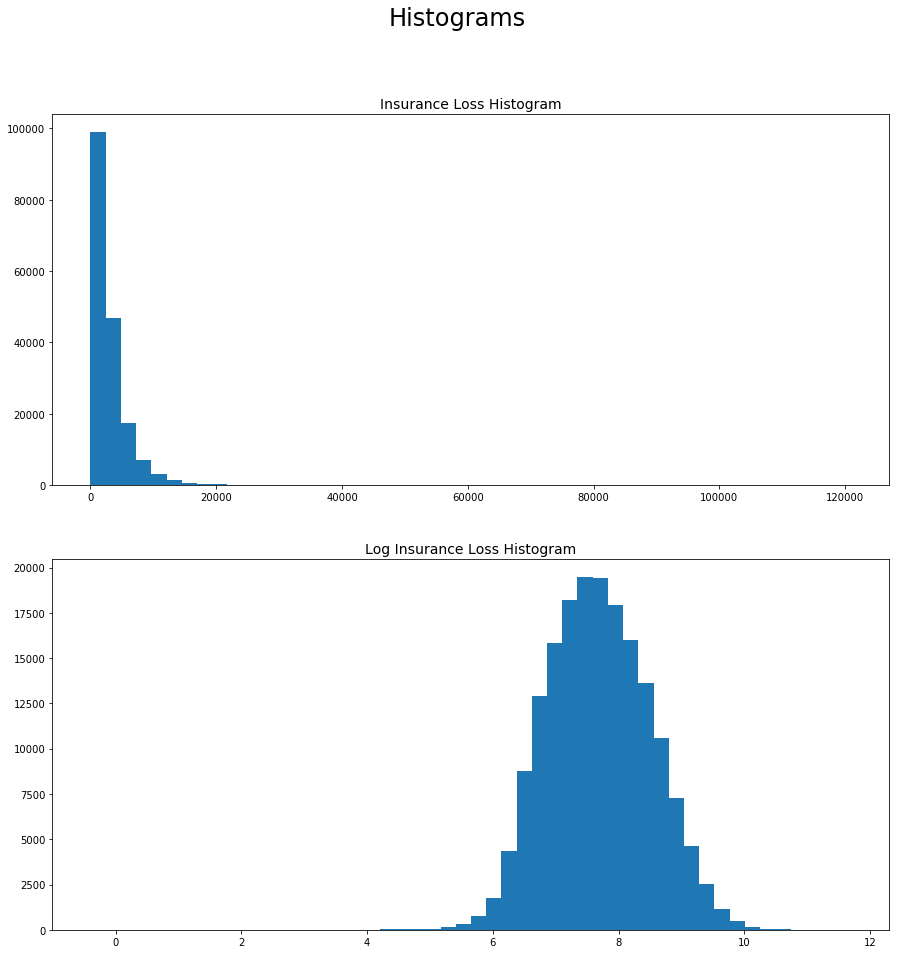

In [105]:
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.suptitle("Histograms",fontsize=24)
plt.subplot(2,1,1)
plt.hist(train[insurance_loss], bins =50)
plt.title('Insurance Loss Histogram',fontsize=14)
plt.subplot(2,1,2)
plt.title('Log Insurance Loss Histogram',fontsize=14)
plt.hist(train[log_loss],bins=50)
plt.show()

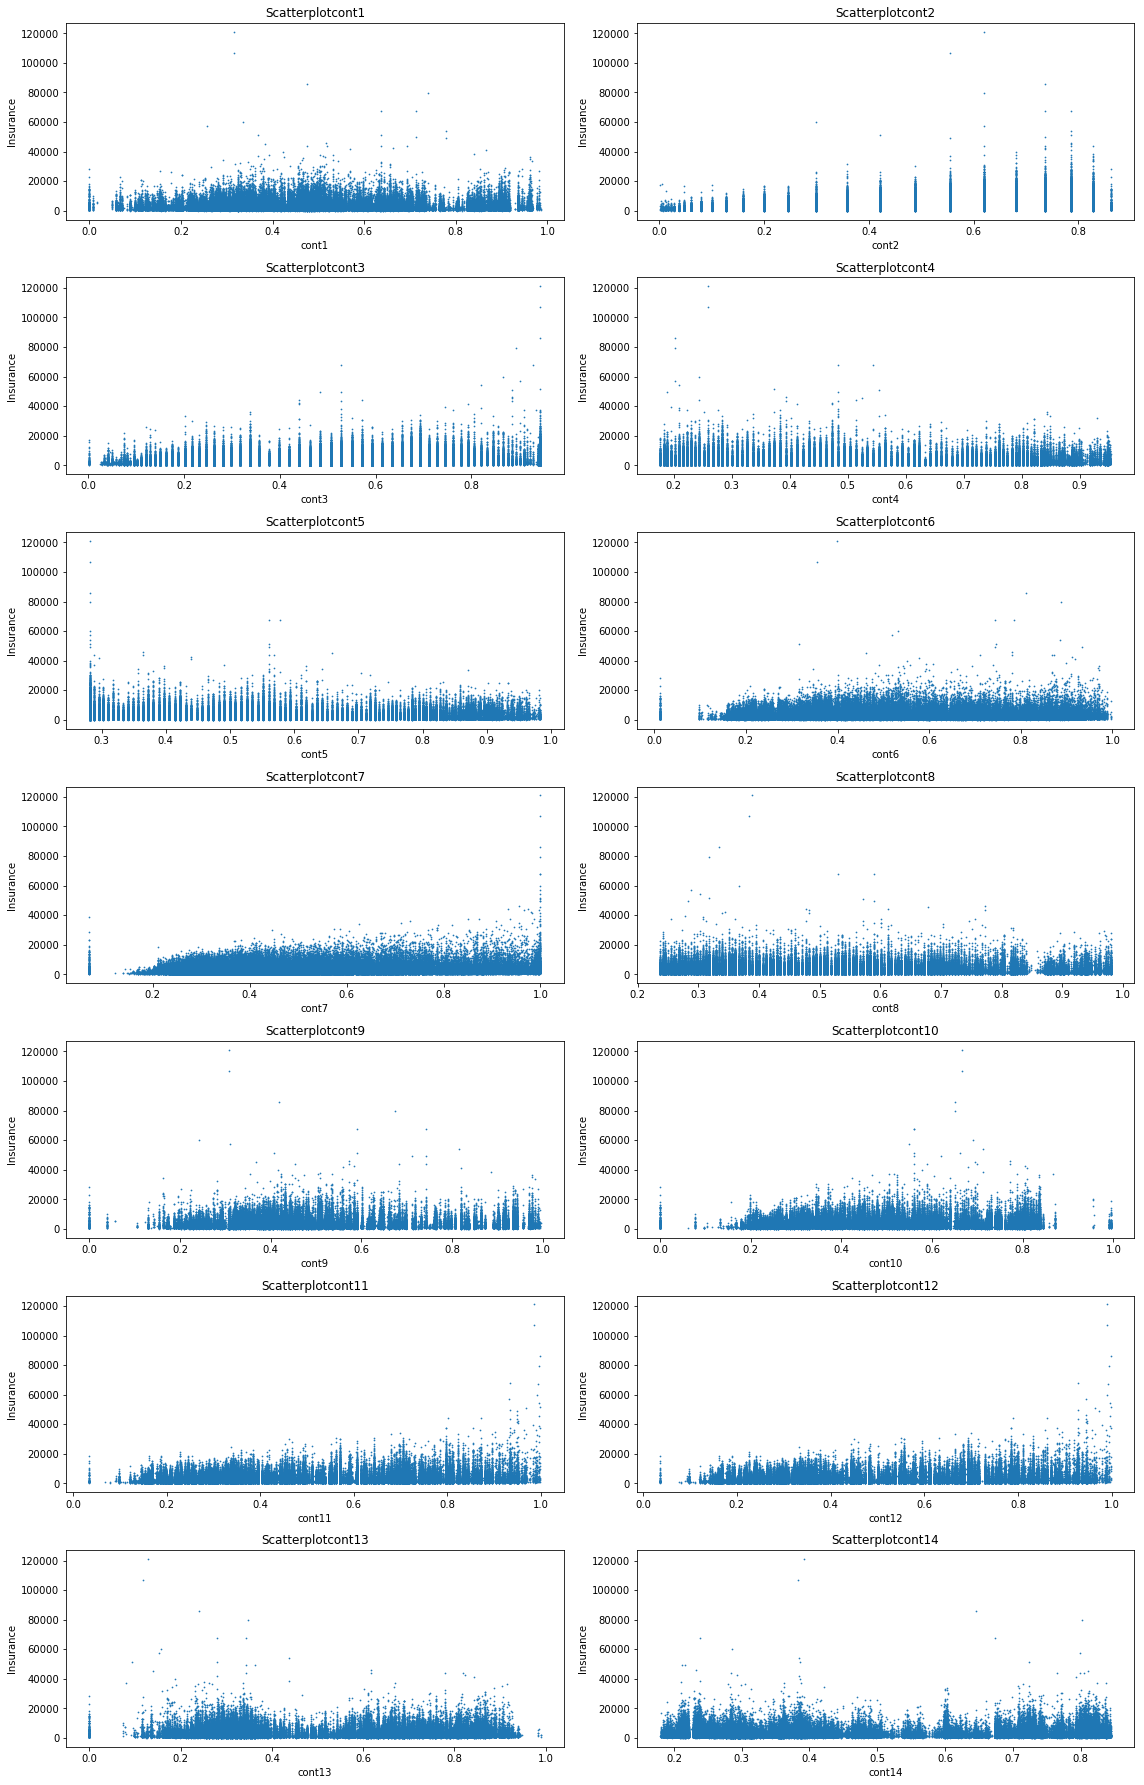

In [106]:
def continuous_scatter():
    fig = plt.figure()
    fig.set_figheight(28)
    fig.set_figwidth(16)
    
    axes=[]
    count=1
    for col in continuous_cols:
        axes.append(fig.add_subplot(8,2,count))
        axes[-1].scatter(train[col],train[insurance_loss],s=.5)
        plt.title("Scatterplot"+col)
        plt.xlabel(col)
        plt.ylabel('Insurance')
        count+=1
    plt.tight_layout()
continuous_scatter()

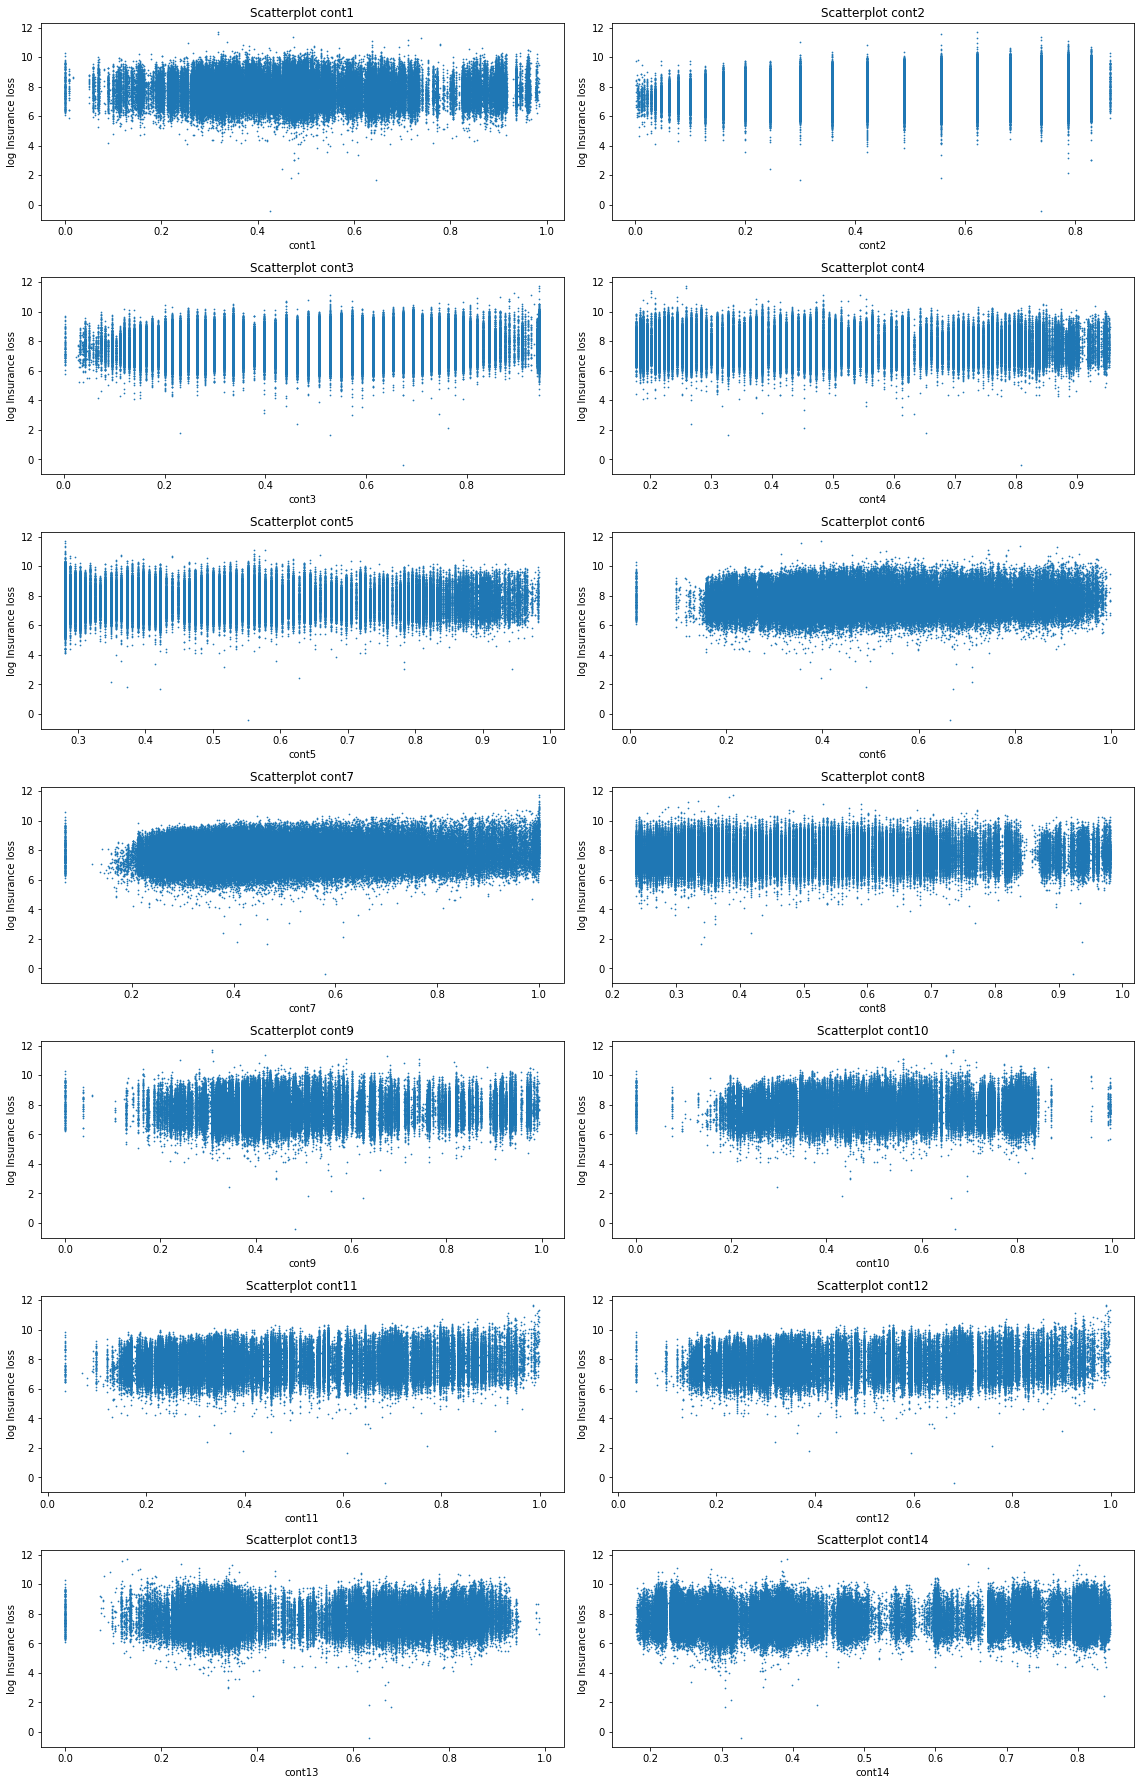

In [107]:
def continuous_scatter_log():
    fig = plt.figure()
    fig.set_figheight(28)
    fig.set_figwidth(16)
    
    axes=[]
    count=1
    for col in continuous_cols:
        axes.append(fig.add_subplot(8,2,count))
        axes[-1].scatter(train[col],train[log_loss],s=.5)
        plt.title("Scatterplot "+col)
        plt.xlabel(col)
        plt.ylabel('log Insurance loss')
        count+=1
    plt.tight_layout()
continuous_scatter_log()

In [133]:
pca=PCA()
x=pca.fit_transform(train[continuous_cols])
xdev=pca.transform(dev[continuous_cols])

ANSWER:a: K nearest NEighbors does not assign weights to features, and therefore can easily get caught up on the unimportant words that weren't eliminated by preprocessing
b: The logistic regression is inherentaly binomial and may not classfiy multinomial as well as Naive Bayes
c: C is the inverse of the regularization strength, as C increases, regularization strength decreases and the sum of squares of the coefficients increases

In [124]:
x_df=pd.DataFrame(x)

In [132]:
x[:,:5]

array([[-0.26320959,  0.15846967, -0.05398837,  0.06700413,  0.10983877],
       [-0.19738703, -0.02938762,  0.15642511, -0.13873133,  0.35555768],
       [ 0.1276719 ,  0.5909216 , -0.23411279, -0.10215418,  0.01588989],
       ..., 
       [-0.32354517,  0.37467593,  0.07721183,  0.03761465, -0.12105141],
       [ 0.40424386,  0.2039617 , -0.30872824,  0.18700313, -0.04256078],
       [ 1.15497022, -0.08875536,  0.17315766,  0.21849325,  0.28303955]])

In [135]:
lm=LinearRegression()
lm.fit(x[:,:5],train[insurance_loss])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
lm.score(xdev[:,:5],dev[insurance_loss])

0.034413466355736611

In [139]:
pca_pipe3=Pipeline(steps=[('decomp',PCA(n_components=5)),('lm',LinearRegression())])
pca_pipe3.fit(train[continuous_cols],train[insurance_loss])
pca_pipe3.score(dev[continuous_cols],dev[insurance_loss])


0.034413466355736611

In [ ]:
# pca=PCA()
# x_train=pca.fit_transform(train[data])
# x_dev=pca.transform(dev)
#NOPE

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

ANSWER: "Religion" is a top ranked word for the atheism group, but not for the religion group.
For the bigrams, I was expecting at least some overlap, and to have to do some cleanup, but it seems that wasn't neccesary. Also the /\ expression was fairly common

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

ANSWER: The two documents that were from the religious forum and confused for computer graphics posts were both about downloading the Book of Mormon through FTP. The computer terminology probably threw the model off.
The alt.atheism document confused for a talk.religion document seems to have been a conspiracy theory about the Waco tragedy. It was a somewhat religious topic, but was likely discussed in a variety of newgroups. In this context, it may have been about criticisms of the Branch Davidians.

Tfidf Vectorizer is different from count vectorizer in that it assigns a percentage each word rahter than a count, and and adjusts for words that appear very often and those that don't. I had actually been using it's equivalentin my pipelines the entire time.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.